## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno/edit#gid=1841568595'
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21


## Анализ данных

Так как внутри таблицы есть разделение по месяцам, то сделаем для каждого месяца датафреймы, включающие все операции на этот месяц

In [ ]:
jun = df[df['status'] == 'Июнь 2021'].index[0]
jul = df[df['status'] == 'Июль 2021'].index[0]
aug = df[df['status'] == 'Август 2021'].index[0]
sep = df[df['status'] == 'Сентябрь 2021'].index[0]
oct = df[df['status'] == 'Октябрь 2021'].index[0]

In [ ]:
df[df['status'] == 'Ноябрь 2021']

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date


In [ ]:
may_df = df.iloc[1:jun,:]
jun_df = df.iloc[jun + 1:jul,:]
jul_df = df.iloc[jul + 1:aug,:]
aug_df = df.iloc[aug + 1:sep,:]
sep_df = df.iloc[sep + 1:oct,:]
oct_df = df.iloc[oct + 1:,:]

In [ ]:
df_list = [may_df, jun_df, jul_df, aug_df, sep_df, oct_df]
month_list = ['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь']

In [ ]:
may_df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
5,18.0,"4 253,70",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,07.07.21


Есть пустая колонка *Unnamed: 5*, удалим ее из всех таблиц

In [ ]:
for data in df_list:
    data.drop(columns=['Unnamed: 5'], inplace=True)

Посмотрим на пропуски в данных за каждый месяц

In [ ]:
for i, data in enumerate(df_list):
  print(month_list[i])
  print('---'*2)
  print(data.isna().sum())
  print('***' * 10)

Май
------
client_id         0
sum               0
status            0
sale              0
new/current       0
document          4
receiving_date    0
dtype: int64
******************************
Июнь
------
client_id         0
sum               0
status            0
sale              0
new/current       0
document          1
receiving_date    1
dtype: int64
******************************
Июль
------
client_id         0
sum               0
status            0
sale              0
new/current       0
document          1
receiving_date    3
dtype: int64
******************************
Август
------
client_id         0
sum               0
status            0
sale              0
new/current       0
document          4
receiving_date    6
dtype: int64
******************************
Сентябрь
------
client_id          0
sum                0
status             0
sale               0
new/current        0
document           3
receiving_date    17
dtype: int64
******************************
Октябрь


In [ ]:
for data in df_list:
    data['sum'] = data['sum'].apply(lambda x: ''.join([i for i in x if i.isdigit()]))
    data['sum'] = data['sum'].astype('float')

### Первый вопрос

Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [ ]:
jul_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
259,15.0,1383870.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.08.21
260,16.0,158650.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,09.08.21
261,18.0,299670.0,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN
262,21.0,431370.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,17.09.21
263,24.0,1940770.0,ОПЛАЧЕНО,Андреев,текущая,оригинал,19.08.21


In [ ]:
jul_df['status'].value_counts()

ОПЛАЧЕНО      109
ПРОСРОЧЕНО      1
Name: status, dtype: int64

In [ ]:
jul_df[jul_df['status'] != 'ПРОСРОЧЕНО']['sum'].sum()

85832435.0

Ответ: **85832435** рублей

### Второй вопрос

Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [ ]:
df.status.value_counts()

ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: status, dtype: int64

Будем считать выручку компании по статусу "Оплачено"

Добавим новую колонку в каждый датафрейм (флажок, который показывает месяц), а далее снова объединим данные

In [ ]:
for i, data in enumerate(df_list):
    data['month'] = month_list[i]

In [ ]:
may_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,1169370.0,ВНУТРЕННИЙ,-,-,-,-,Май
2,14.0,545270.0,ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,Май
3,15.0,1399170.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май
4,16.0,7197.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май
5,18.0,425370.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,07.07.21,Май


In [ ]:
new_df = pd.concat(df_list,axis=0)

In [ ]:
rev_month = new_df[new_df['status'] == 'ОПЛАЧЕНО'].groupby('month')['sum'] \
                                      .agg('sum').reset_index()

revenue_list = [rev_month[rev_month['month'] == m]['sum'] for m in month_list]

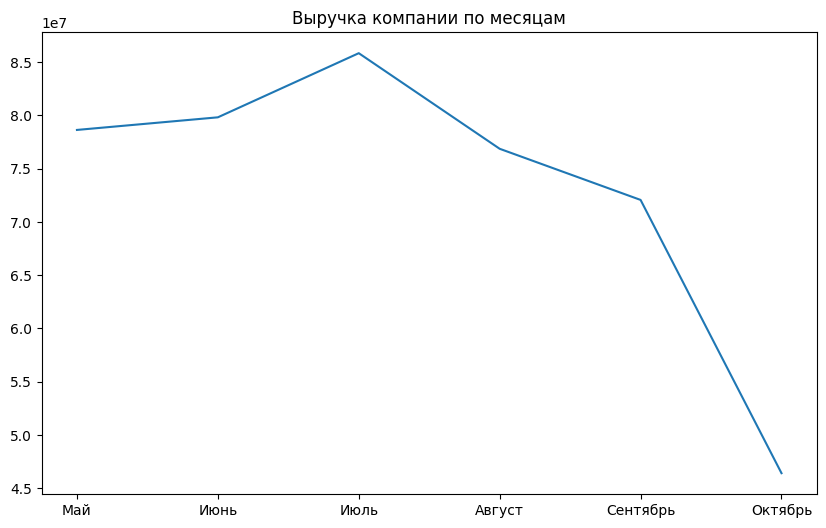

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(month_list, revenue_list)
plt.title('Выручка компании по месяцам')
plt.show()

### Третий вопрос

Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [ ]:
sale_sep = sep_df[sep_df['status'] == 'ОПЛАЧЕНО'].groupby('sale')['sum'].sum() \
                                                 .reset_index() \
                                                 .sort_values(by='sum', ascending=False)

In [ ]:
sale_sep.head(1)

,sale,sum
6,Смирнов,20282848.0


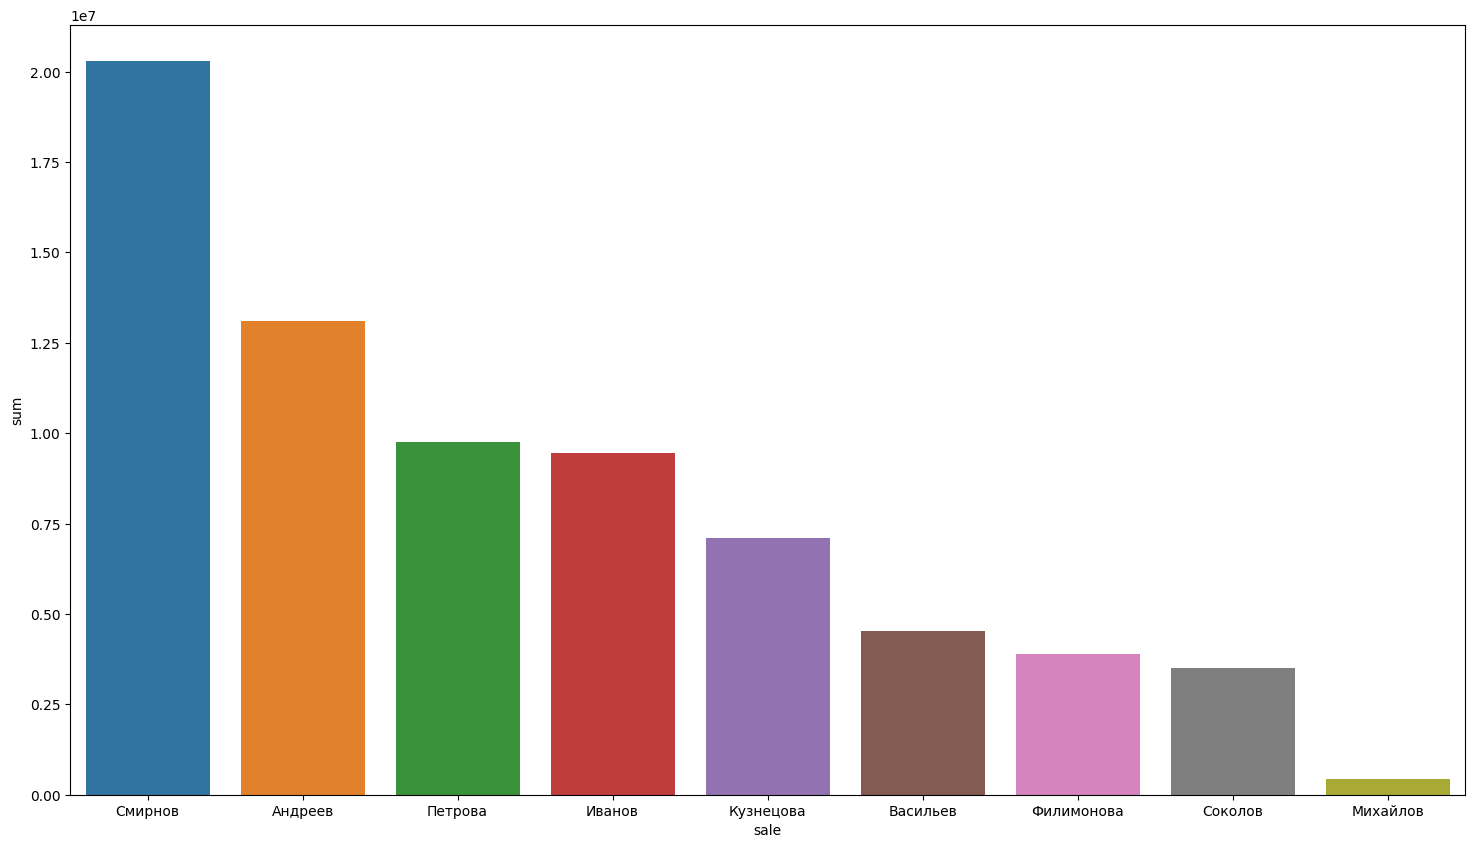

In [ ]:
plt.figure(figsize=(18, 10))

sns.barplot(data = sale_sep,  x = sale_sep['sale'], y = sale_sep['sum'])
plt.show()

Ответ: **Смирнов**

### Четвертый вопрос

Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [ ]:
oct_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
595,15.0,1459170.0,В РАБОТЕ,Иванов,текущая,оригинал,11.11.21,Октябрь
596,16.0,129170.0,В РАБОТЕ,Иванов,текущая,оригинал,11.11.21,Октябрь
597,379.0,606370.0,В РАБОТЕ,Иванов,новая,оригинал,11.11.21,Октябрь
598,24.0,1859270.0,ОПЛАЧЕНО,Андреев,текущая,оригинал,12.11.21,Октябрь
599,24.0,145370.0,ОПЛАЧЕНО,Андреев,текущая,оригинал,12.11.21,Октябрь


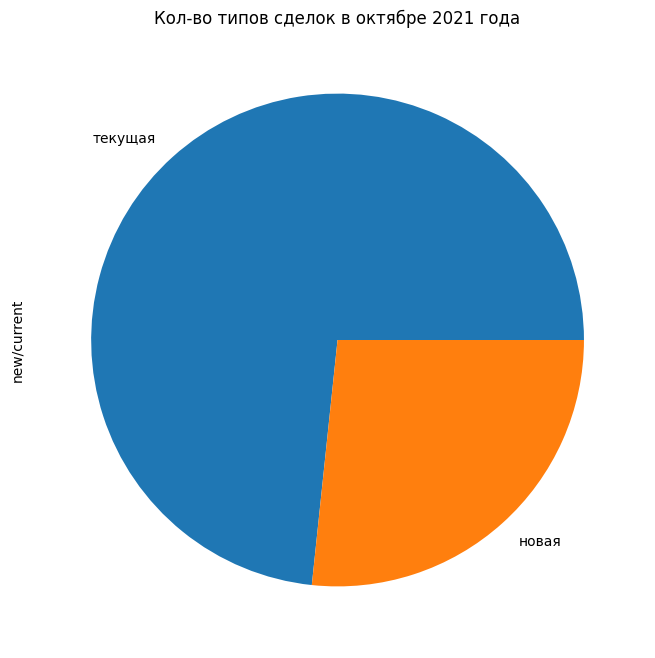

In [ ]:
oct_df['new/current'].value_counts() \
                     .plot(kind='pie', title='Кол-во типов сделок в октябре 2021 года', figsize=(10, 8))
plt.show()

Ответ: Тип сделок "Текущая" преобладает

### Пятый вопрос

Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [ ]:
may_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,1169370.0,ВНУТРЕННИЙ,-,-,-,-,Май
2,14.0,545270.0,ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,Май
3,15.0,1399170.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май
4,16.0,7197.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май
5,18.0,425370.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,07.07.21,Май


Преобразуем через pd.to_datetime временные данные *receiving_date* и достанем оттуда 6-ой месяц

In [ ]:
may_new_df = may_df.iloc[1:,:]
may_new_df.receiving_date = pd.to_datetime(may_new_df.receiving_date, dayfirst=True)
may_new_df['receiving_month'] = may_new_df.receiving_date.dt.month

In [ ]:
may_new_df.head(10)

,client_id,sum,status,sale,new/current,document,receiving_date,month,receiving_month
2,14.0,545270.0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май,7
3,15.0,1399170.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май,6
4,16.0,7197.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май,6
5,18.0,425370.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май,7
6,20.0,579670.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,Май,7
7,21.0,361370.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13,Май,10
8,23.0,851170.0,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-08,Май,6
9,24.0,1634770.0,ОПЛАЧЕНО,Андреев,новая,оригинал,2021-06-23,Май,6
10,28.0,1053770.0,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-06-16,Май,6
11,30.0,383370.0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-21,Май,6


In [ ]:
may_new_df[(may_new_df['document'] == 'оригинал') & (may_new_df['receiving_month'] == 6)].shape[0]

76

Ответ: **76**

### Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [ ]:
new_df = new_df.iloc[1:, :]

In [ ]:
new_df.receiving_date = pd.to_datetime(new_df.receiving_date, dayfirst=True)
new_df['receiving_month'] = new_df.receiving_date.dt.month

In [ ]:
new_df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month,receiving_month
2,14.0,545270.0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май,7.0
3,15.0,1399170.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май,6.0
4,16.0,7197.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май,6.0
5,18.0,425370.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май,7.0
6,20.0,579670.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,Май,7.0


Оставим данные за май и июнь с подписанным оригиналом, где оригиналы приходят после 01.07.2021  

In [ ]:
ost =  new_df[(new_df['document'] == 'оригинал') &
       ((new_df['month'] == 'Май') | (new_df['month'] == 'Июнь')) &
       (new_df['receiving_month'] >= 7) &
       (new_df['status'] != 'ПРОСРОЧЕНО')]

In [ ]:
ost.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month,receiving_month
2,14.0,545270.0,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май,7.0
5,18.0,425370.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май,7.0
6,20.0,579670.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,Май,7.0
7,21.0,361370.0,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13,Май,10.0
12,32.0,735390.0,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,Май,7.0


Посчитаем остаток для менеджеров за новые сделки

In [ ]:
new_deal = ost[(ost['status'] == 'ОПЛАЧЕНО') & (ost['new/current'] == 'новая')]
new_deal['ost'] = 0.07 * new_deal['sum']

In [ ]:
n = new_deal.groupby('sale')['ost'].sum().reset_index()
n

,sale,ost
0,Васильев,18750.90
1,Петрова,287744.80
2,Селиванов,427682.99
3,Смирнов,21375.90
4,Филимонова,72746.80


In [ ]:
def ost_func(row):
    if row >= 10000:
      return row * 0.05
    return row * 0.03

Посчитаем остаток для менеджеров за текущие сделки

In [ ]:
present_deal = ost[(ost['status'] != 'ПРОСРОЧЕНО') & (ost['new/current'] == 'текущая')]
present_deal['ost'] = present_deal['sum'].apply(ost_func)

In [ ]:
p = present_deal.groupby('sale')['ost'].sum().reset_index()
p

,sale,ost
0,Андреев,514887.95
1,Васильев,135182.02
2,Иванов,744433.09
3,Кузнецова,702559.98
4,Петрова,1162892.90
5,Селиванов,160129.50
6,Смирнов,766660.00
7,Соколов,44868.50
8,Филимонова,265081.65


Итоговый результат

In [ ]:
summary = pd.concat([n, p])
summary.groupby('sale')['ost'].sum().reset_index()

,sale,ost
0,Андреев,514887.95
1,Васильев,153932.92
2,Иванов,744433.09
3,Кузнецова,702559.98
4,Петрова,1450637.70
5,Селиванов,587812.49
6,Смирнов,788035.90
7,Соколов,44868.50
8,Филимонова,337828.45


1. Вопросы:

1) Как хорошо Вы владеете Python? Оцените свой уровень по шкале от 0 до 10,
где 0 - совсем не знаю, 10 - владею в совершенстве.
Объясните, почему Вы выбрали такой балл.

Ответ : *8 баллов. Я начал изучение языка Python в 2020 году, прохожу различные курсы, решаю алгоритмические задачи и задачи на анализ данных, то есть хорошо знаю синтаксис языка, а также использую сторонние библиотеки для решения различных задач*

2) Насколько хорошо Вы знакомы с Google Sheets? Оцените свой уровень по
шкале от 0 до 10, где 0 - совсем не знаю, 10 - владею в совершенстве.
Объясните, почему Вы выбрали такой балл.

Ответ : *6 баллов. С Google Sheets у меня мало опыта. Я сейчас работаю репетитором по математике и за прогрессом учеников как раз слежу через Google Sheets*

2. Задачи на логику:

1) Рекламная кампания стартовала вчера с дневным бюджетом 40 $. Половина
бюджета была израсходована к полудню, а 80% оставшегося бюджета было
потрачено между полуднем и временем закрытия. Сколько долларов не было
потрачено?

Ответ: 4

2) 5 идентичных рекламных кампаний работали 24 дня по 6 часов в день,
потрачено было 120 долларов. Сколько дней они работали бы на 216 долларов,
если бы 9 одинаковых кампаний работали бы по 8 часов в день?

Ответ: 18

3) Дизайнеры создали 200 рекламных баннеров для двух рекламных кампаний. 80
из них не использовались ни в кампании No1, ни в кампании No2, 60
использовались только в кампании No1. И для каждого рекламного баннера,
который использовался в обеих кампаниях, приходится 3 баннера, которые
использовались только в кампании No2. Сколько баннеров было использовано в
обеих рекламных кампаниях?

Ответ: 80 для кампании № 1, 60 для кампании № 2

4) Энн использует Instagram, но не Facebook, а Джон использует Youtube и
Facebook. Кейт использует Youtube, но не Instagram, а Том использует Facebook,
но не Youtube. Если каждый человек использует две из трех социальных сетей,
у кого предпочтения совпадают?

Ответ: Джон и Кейт

5) Средний итоговый балл стажера по 4 модулям составляет 78 баллов. Сколько
баллов должен получить стажер за 5-й модуль, чтобы средний балл по всему
заданию составил 80?

Ответ: 88

6) Заказанные в приложении товары доставляются на автомобиле. Автомобиль
проезжает 260 км со средней скоростью 80 км / ч. На обратном пути машина
движется со средней скоростью 100 км / ч. Насколько быстрее был обратный
путь? Ответ указать в минутах.

Ответ: 39